In [58]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

# Cascade Integrator Comb Filters
A really good reference is this [page](https://www.dsprelated.com/showarticle/1337.php)

Another good reference is Understanding Digital Signal Processing by Richard G. Lyons.

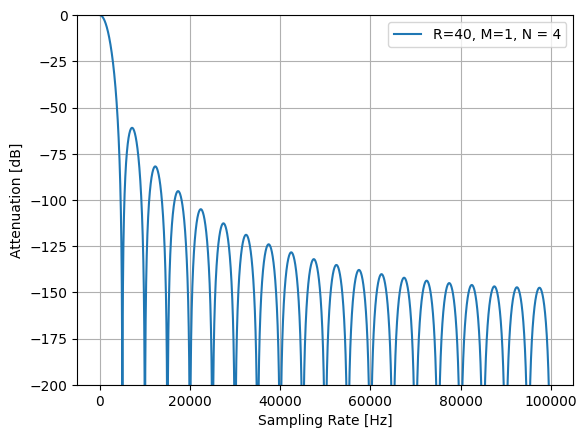

In [59]:
Fs = 200000
w = np.linspace(1E-5, 0.5, 10000)
f = w * Fs

# R is the decimation ratio, N is the filter order, M is a free number usually 1 or 2
R = 40
N = 4
M = 1

H = np.abs((np.sin(R*M*np.pi*w) / (R*M * np.sin(np.pi * w))))**N
Hdb = 10 * np.log(H)
kstr = 'R={0}, M={1}, N = {2}'.format(R, M, N)
plt.plot(f, Hdb, label=kstr)

plt.legend()
plt.grid()
plt.ylim([-200, 0])
plt.xlabel('Sampling Rate [Hz]')
plt.ylabel('Attenuation [dB]')
plt.show()

Text(0, 0.5, 'Magnitude')

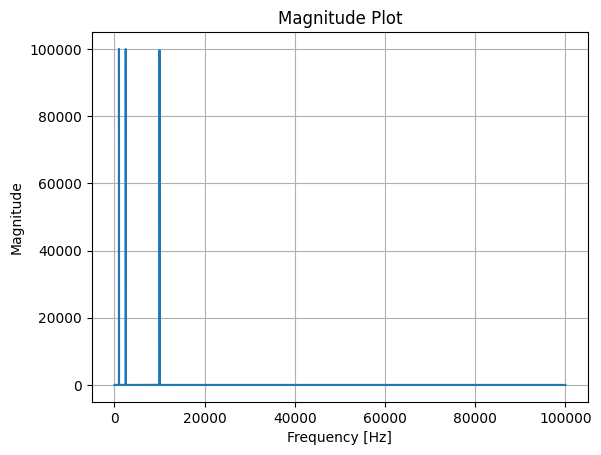

In [60]:
t = np.linspace(0, 1, Fs)
f1 = 1000.0
f2 = 2500.0
f3 = 10000.0
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)
X = np.fft.fft(x)
W = np.linspace(0, Fs, len(X))
plt.plot(W[0:len(x)//2], abs(X[0:len(x)//2]))
plt.title('Magnitude Plot')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

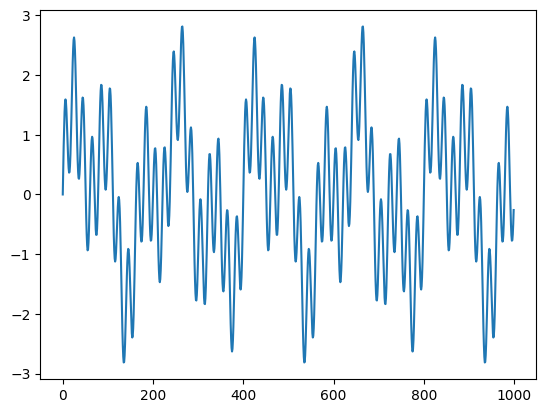

In [61]:
plt.plot(x[0:1000])

In [62]:
def cic(data, N, R):
    sigma = np.zeros((N))
    delta = np.zeros((N))
    pDelta = np.zeros((N))
    data_len = data.shape[0] // R
    filtered = np.zeros((data_len))
    in_index = 0

    # TODO Make this generic for N

    for out_index in range(data_len):
        pDelta[0] = sigma[3]
        pDelta[1] = delta[1]
        pDelta[2] = delta[2]
        pDelta[3] = delta[3]

        for n in range(R):
            sigma[0] += data[in_index]
            sigma[1] += sigma[0]
            sigma[2] += sigma[1]
            sigma[3] += sigma[2]
            in_index += 1

        delta[1] = sigma[3] - pDelta[0]
        delta[2] = delta[1] - pDelta[1]
        delta[3] = delta[2] - pDelta[2]
        filtered[out_index] = delta[3] - pDelta[3]

    return filtered

In [63]:
N = 4
R = 32
y = cic(x, N, R)

Text(0, 0.5, 'Magnitude')

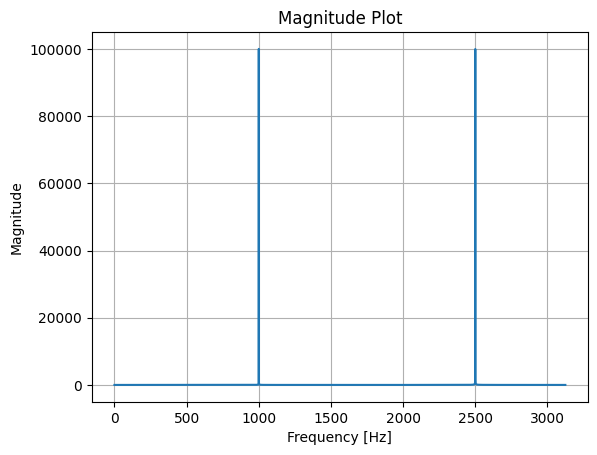

In [64]:
Fs2 = Fs // R
t = np.linspace(0, 1, Fs2)
Y = np.fft.fft(y)
W = np.linspace(0, Fs2, len(Y))
plt.plot(W[0:len(Y)//2], abs(X[0:len(Y)//2]))
plt.title('Magnitude Plot')
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Gain and Word Width
CIC Filter gain is (NR)^M

Register bit widths is x(n) bits + [M * log2(NR)]

N is the filter order or the number of stages
R is the decimation ratio
M is a free number usually 1 or 2

In [66]:
gain = (N*R) ** M
input_width = 16
max_width = input_width + (M * math.log2(N * R))

print(f'Gain: {gain} max bit width: {max_width}')

Gain: 128 max bit width: 23.0
